**Discrete Inverse Transform Sampler for Poisson Distribution**

In [38]:
using StatsBase
using Distributions
using StatsPlots
lambda = 10                           # value for lambda for Poissons Distribution can be changed here
function Poisson(lam)                 # function to draw one sample
    i = 0
    p = exp(-lam)
    A = p
    u = rand(Uniform(0,1))
    while u>=A                        # running the loop until we find u < A
        i = i + 1
        p = (lam*p)/i
        A = A + p
    end
return i
end

m = Int(1e4)                          # the number of iterations for sampling for the distribution
x = fill(0,(1,m))
for i in 1:m
    x[i] = Poisson(lambda)
end

In [39]:
mean(x)                             # Mean of Poisson distribution is equivalent to lambda itself

9.9807

In [40]:
println("Error from theoreotical expectation is $(mean(x)-lambda)")

Error from theoreotical expectation is -0.01929999999999943


In [41]:
var(x)                             # Variance is also equal to lambda

9.78570608060806

In [42]:
println("Error from theoreotical expectation is $(var(x)-lambda)")

Error from theoreotical expectation is -0.21429391939193998


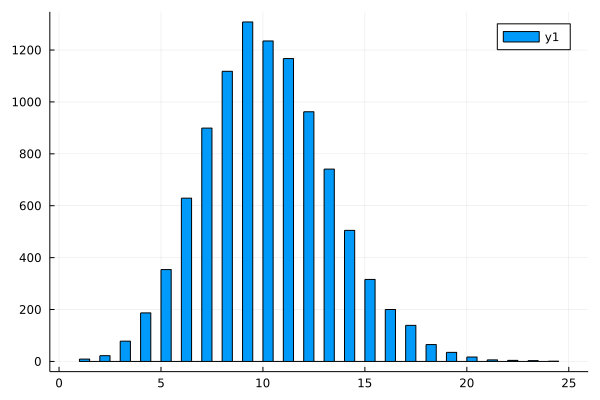

In [43]:
plot(histogram(vec(x)))

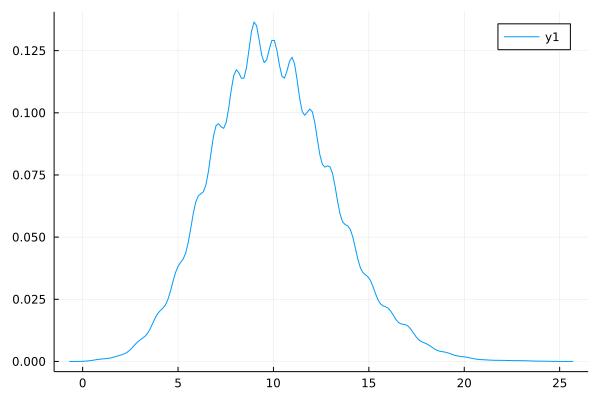

In [44]:
plot(density(vec(x)))

**Accept Reject Sampler for Binomial(n,p) using Poisson Proposal**

In [45]:
function sample_binom(n,p)                          # drawing one sample using the poisson function, I made above
    accept = 0
    c_all = fill(0.001,(1,n))                       # creating n dimensional float valued array
    for i in 1:n
        c_all[i] = (binomial(n,i) * ((1-p)^(n-i)) * p^i * exp(lambda) * factorial(big(i))) / (lambda^i)         # calculating c = Binomial/Poisson
    end
    c = maximum(c_all)
    
    rtn = 0
    while accept == 0
        u = rand()
        prop = Poisson(lambda)
        ratio = (binomial(n,prop) * ((1-p)^(n-prop)) * p^prop * exp(lambda) * factorial(big(prop))) / (c*lambda^prop)   # ratio is Binomial/c*Poisson which is always less than 1
        if u < ratio
            accept = 1
            rtn = prop
        end
    end
    return rtn
end

n = 10                              # setting value of n and p for the Binomial distribution, a good sample is when n is somewhere between (lambda,2*lambda)
p = 0.25
samp = fill(0,(1,m))
for j in 1:m
    samp[j] = sample_binom(n,p)
end

mean(samp)        # mean is n*p


2.5947

In [46]:
println("Error from theoreotical expectation is $(mean(samp)-n*p)") 

Error from theoreotical expectation is 0.0947


In [47]:
var(samp)         # theoreotical variance is n*p*(1-p)

1.649596869686968

In [48]:
println("Error from theoreotical variance is $(var(samp)-n*p*(1-p))")

Error from theoreotical variance is -0.22540313031303194


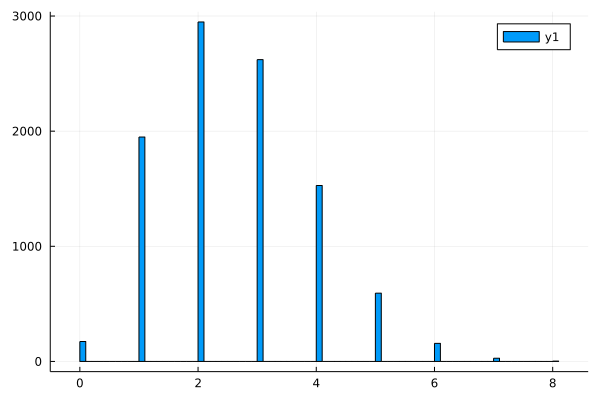

In [49]:
plot(histogram(vec(samp)))

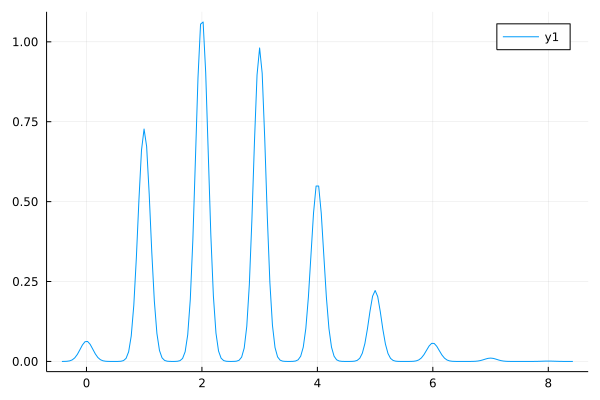

In [50]:
plot(density(vec(samp)))

**Thank You. I am coding a long time after ESC101. If it doesnt look so professional or for any mistakes, forgive me. Please, tell me where I can improve.**